<a href="https://colab.research.google.com/github/wlai0611/gradient_descent_lennard_jones/blob/main/driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:

def get_gradients(func, parameters, perturb=0.0001):
    gradients = np.zeros(len(parameters))
    for param_number, parameter in enumerate(parameters):
        param_copy = parameters.copy()
        param_copy[param_number] += perturb
        forward_perturb          =  param_copy.copy()
        param_copy               =  parameters.copy()
        param_copy[param_number] -= perturb
        backward_perturb         =  param_copy.copy()
        gradients[param_number]  =  (func(forward_perturb) - func(backward_perturb))/(2*perturb)
    return gradients

def gradient_descent(func, starting_params, max_iter=100, step_len=0.1, tolerance=3):
    fx      = func(starting_params)
    counter = 0
    params  = starting_params.copy()
    steps   = []
    steps.append(starting_params)
    fxs     = []
    fxs.append(fx)
    while abs(fx) > tolerance and counter < max_iter:
        gradients            = get_gradients(func, params)
        normalized_gradients = gradients/np.sqrt(np.sum(gradients**2))
        step_direction = normalized_gradients
        step_vector    = step_len * step_direction
        params         = params - step_vector
        fx = func(params)
        steps.append(params)
        fxs.append(fx)
        counter += 1

    return steps, fxs

def coordinates_to_potential_sum(coordinates, func = lambda r:4*(r**-12-r**-6)):
    potential_sum = 0
    coordinates = coordinates.reshape((len(coordinates)//2,2))

    for atom_i in range(len(coordinates)):
        per_dimension_distances = coordinates[atom_i,:] - coordinates
        interatomic_distances   = np.sqrt(np.sum(per_dimension_distances**2,axis=1))
        interatomic_distances[np.isclose(interatomic_distances,0)] = 1
        atom_i_potentials = func(interatomic_distances)
        potential_sum += atom_i_potentials.sum()

    return potential_sum/2 #its symmetric, we double counted


In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from matplotlib import rc
rc('animation', html='jshtml')
#copied from https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook

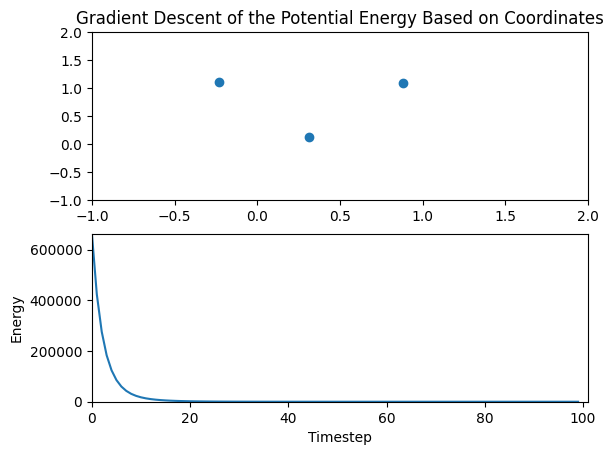

In [7]:
rng             = np.random.default_rng(seed=1)
starting_params = rng.random(6)
steps, fxs = gradient_descent(coordinates_to_potential_sum, 
                              starting_params, 
                              step_len=0.01, 
                              max_iter=100, 
                              tolerance=0.01)
steps = np.array(steps)
nsteps, nparams = steps.shape
steps = steps.reshape(nsteps, nparams//2, 2)
fig, ax = plt.subplots(nrows=2)
ax[0].set(xlim=(-1,2),ylim=(-1,2), title='Gradient Descent of the Potential Energy Based on Coordinates')
atoms = ax[0].scatter(steps[0,:,0], steps[0,:,1])
ax[1].set(xlim=(0,len(fxs)), ylim=(0,max(fxs)))
energies, = ax[1].plot([],[])
ax[1].set(xlabel='Timestep',ylabel='Energy')

def animate(i):
    current_step = steps[i]
    atoms.set_offsets(current_step[:,:2])
    energies.set_data(np.arange(i),fxs[:i])
    return atoms, energies

anim = anm.FuncAnimation(fig, animate, frames = len(steps), blit=True)
anim